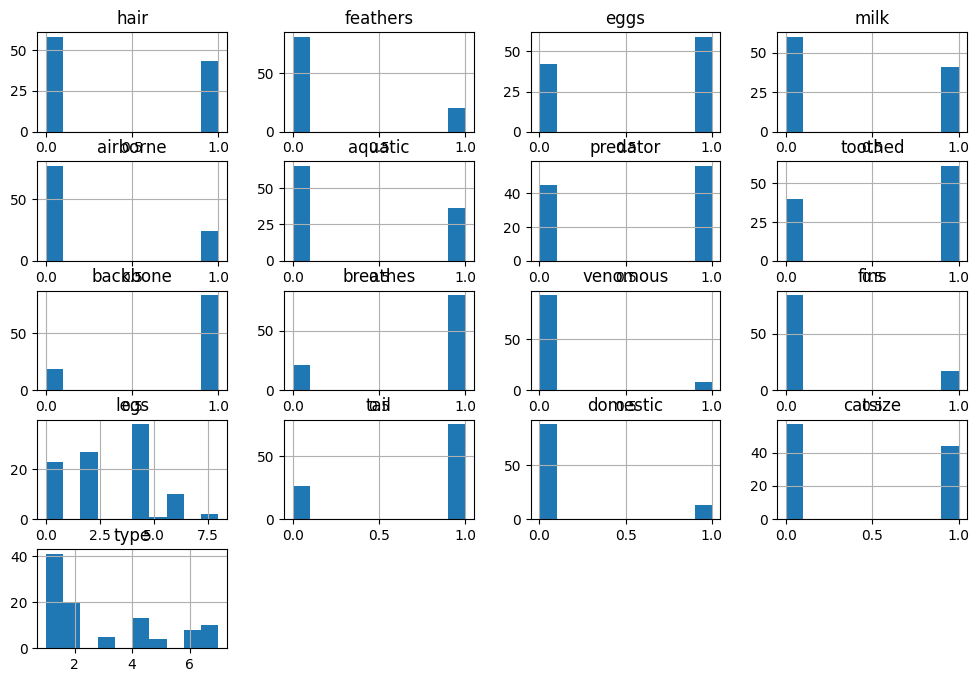

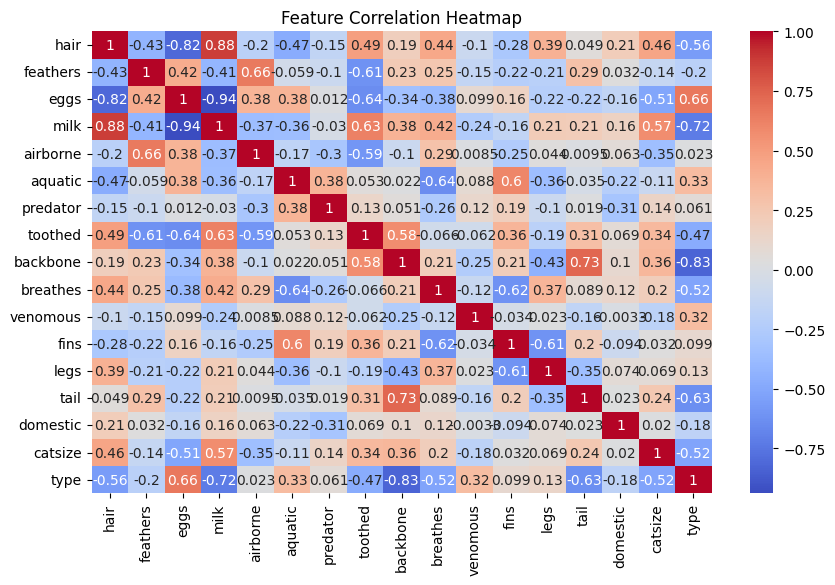

In [4]:
#Step 1: Analyze the Data Using Visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
zoo = pd.read_csv('/content/Zoo.csv')

# Select only numerical features for correlation calculation
numerical_features = zoo.select_dtypes(include=['number'])

# Visualizing feature distributions
zoo.hist(figsize=(12, 8))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm') # Use numerical_features for corr()
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
#Step 2: Data Preprocessing

from sklearn.preprocessing import MinMaxScaler

# Normalizing numerical features
scaler = MinMaxScaler()
zoo.iloc[:, 1:-1] = scaler.fit_transform(zoo.iloc[:, 1:-1])


<ipython-input-7-64a461cbe4c7>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5   0.5   0.    0.5   0.5   0.5   0.5   0.    0.    0.5   0.5   0.25
 0.    0.    0.5   0.75  0.25  0.5   0.    0.    0.25  0.25  0.5   0.25
 0.75  0.5   0.5   0.25  0.5   0.25  0.75  0.5   0.25  0.25  0.    0.5
 0.5   0.25  0.    0.75  0.75  0.25  0.75  0.25  0.5   0.5   0.75  0.5
 0.5   0.5   0.5   0.75  0.5   1.    0.5   0.5   0.25  0.25  0.25  0.25
 0.    0.    0.    0.5   0.5   0.5   0.    0.5   0.5   0.5   0.5   0.25
 1.    0.    0.    0.25  0.    0.    0.25  0.25  0.    0.    0.    0.25
 0.25  0.625 0.    0.25  0.75  0.5   0.5   0.5   0.    0.25  0.5   0.25
 0.25  0.75  0.5   0.    0.25 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  zoo.iloc[:, 1:-1] = scaler.fit_transform(zoo.iloc[:, 1:-1])


In [9]:
#Step 3: Split Dataset into Training & Testing Sets (80-20)
from sklearn.model_selection import train_test_split

# Separate features and target
X = zoo.drop(columns=["animal name", "type"])  # Drop animal name as it's not useful for classification
y = zoo["type"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
#Step 4: Implement KNN Using Scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [22]:
#Step 5: Evaluate Performance
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = knn.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

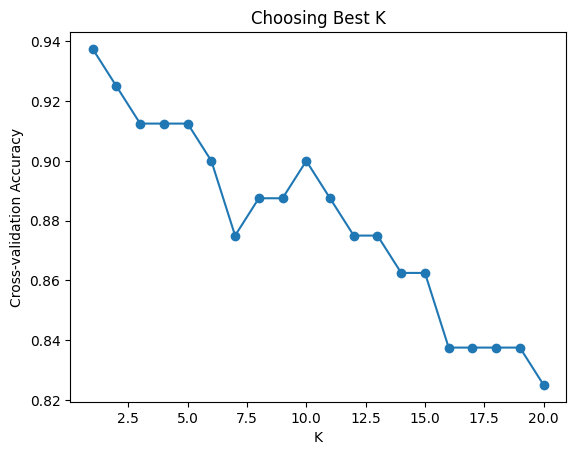

In [23]:
#Step 6: Choosing K and Distance Metric
from sklearn.model_selection import cross_val_score
import numpy as np

# Trying different values of K
scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    score = np.mean(cross_val_score(knn, X_train, y_train, cv=5))
    scores.append(score)

# Plot K vs Accuracy
plt.plot(range(1, 21), scores, marker='o')
plt.xlabel("K")
plt.ylabel("Cross-validation Accuracy")
plt.title("Choosing Best K")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


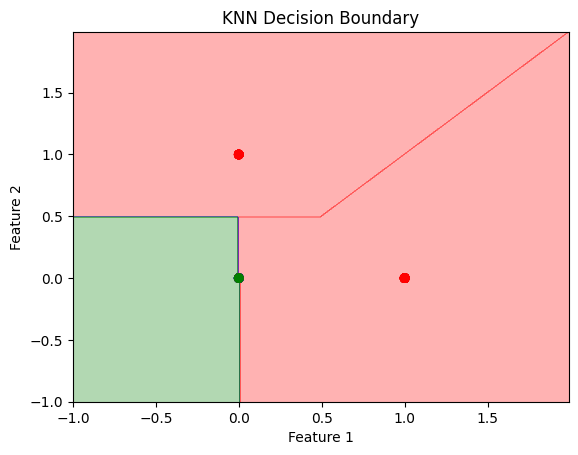

In [24]:
#Step 7: Visualizing Decision Boundaries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Selection two features for visualization
X_vis = X_train.iloc[:, [0, 1]]
y_vis = y_train

# Training KNN on two features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

# Plotting decision boundary
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue', 'green']))
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap=ListedColormap(['red', 'blue', 'green']))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary")
plt.show()


#Interview Questions & Answers
##What are the key hyperparameters in KNN?

* .n_neighbors (K) - Number of nearest neighbors.
* metric - Distance metric (Euclidean, Manhattan, Minkowski, etc.).
* weights - Weighting function (uniform, distance-based).
##2. What distance metrics can be used in KNN?

* Euclidean Distance:
𝑑
(
𝑝
,
𝑞
)
=
∑
(
𝑝
𝑖
−
𝑞
𝑖
)
2
d(p,q)=
∑(p
i
​
 −q
i
​
 )
2

​

* Manhattan Distance:
𝑑
(
𝑝
,
𝑞
)
=
∑
∣
𝑝
𝑖
−
𝑞
𝑖
∣
d(p,q)=∑∣p
i
​
 −q
i
​
 ∣
* Minkowski Distance: Generalized form combining Euclidean & Manhattan.
* Hamming Distance: For categorical data.